In [87]:
import polars as pl
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path

## Check if sleep data is normally distributed
We want to see if the deep / rem sleep durations are normally distributed.

In [88]:
df = pl.read_csv("../data/processed/cleaned_normal_data_experiment.csv", try_parse_dates=True)
df = df.with_columns(
    # REM sleep percentage
    (pl.col("asleep_rem_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("rem_sleep_percentage"),

    # Deep sleep percentage
    (pl.col("asleep_deep_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("deep_sleep_percentage"),

    # Core sleep percentage
    (pl.col("asleep_core_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("core_sleep_percentage"),
).filter(
    ~((pl.col("rem_sleep_percentage") == 0) | (pl.col("deep_sleep_percentage") == 0))
)
df

sleep_day,awake_duration_mins,asleep_unspecified_duration_mins,asleep_core_duration_mins,asleep_rem_duration_mins,asleep_deep_duration_mins,total_sleep_duration_mins,total_time_in_bed_mins,sleep_period_start,sleep_period_end,rem_sleep_percentage,deep_sleep_percentage,core_sleep_percentage
date,f64,f64,f64,f64,f64,f64,f64,"datetime[μs, UTC]","datetime[μs, UTC]",f64,f64,f64
2022-09-15,2.5,0.0,215.0,109.0,56.5,380.5,383.0,2022-09-14 23:37:37 UTC,2022-09-15 05:32:07 UTC,28.65,14.85,56.5
2022-09-16,2.5,0.0,269.5,111.0,81.0,461.5,464.0,2022-09-15 22:17:02 UTC,2022-09-16 05:58:02 UTC,24.05,17.55,58.4
2022-09-17,18.5,0.0,232.5,105.5,94.0,432.0,450.5,2022-09-16 22:30:17 UTC,2022-09-17 05:59:17 UTC,24.42,21.76,53.82
2022-09-18,15.0,0.0,265.5,127.5,51.5,444.5,459.5,2022-09-17 22:52:32 UTC,2022-09-18 06:30:32 UTC,28.68,11.59,59.73
2022-09-19,7.0,0.0,229.5,79.0,62.0,370.5,377.5,2022-09-18 23:13:29 UTC,2022-09-19 05:17:59 UTC,21.32,16.73,61.94
…,…,…,…,…,…,…,…,…,…,…,…,…
2025-05-04,9.5,62.0,239.5,87.5,67.0,456.0,465.5,2025-05-04 00:09:10 UTC,2025-05-04 07:53:24 UTC,19.19,14.69,52.52
2025-05-05,66.0,65.0,256.0,30.5,41.5,393.0,459.0,2025-05-04 23:28:01 UTC,2025-05-05 07:12:53 UTC,7.76,10.56,65.14
2025-05-06,50.0,0.0,274.0,82.5,88.5,445.0,495.0,2025-05-05 21:07:03 UTC,2025-05-06 05:21:03 UTC,18.54,19.89,61.57


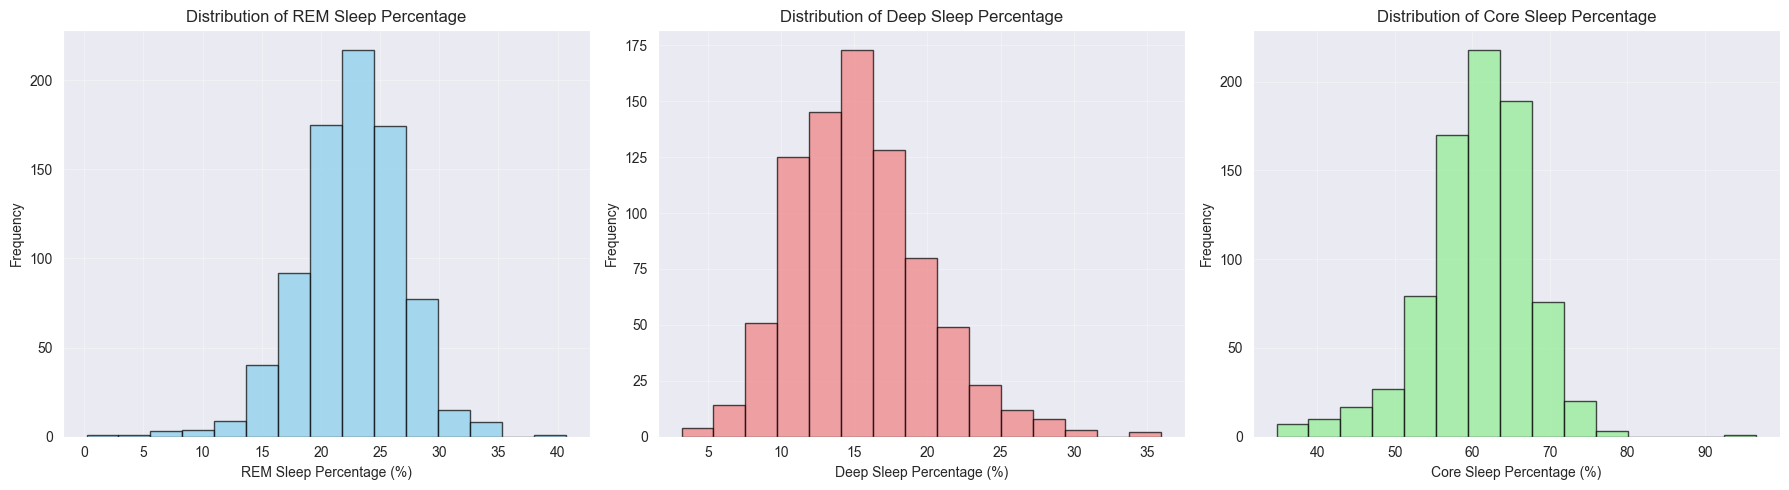

In [89]:
rem_percentages = df['rem_sleep_percentage'].to_numpy()
deep_percentages = df['deep_sleep_percentage'].to_numpy()
core_percentages = df['core_sleep_percentage'].to_numpy()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# REM sleep histogram
ax1.hist(rem_percentages, bins=15, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('REM Sleep Percentage (%)')
ax1.set_ylabel('Frequency')
ax1.set_title('Distribution of REM Sleep Percentage')
ax1.grid(True, alpha=0.3)

# Deep sleep histogram
ax2.hist(deep_percentages, bins=15, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Deep Sleep Percentage (%)')
ax2.set_ylabel('Frequency')
ax2.set_title('Distribution of Deep Sleep Percentage')
ax2.grid(True, alpha=0.3)

# Core sleep histogram
ax3.hist(core_percentages, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
ax3.set_xlabel('Core Sleep Percentage (%)')
ax3.set_ylabel('Frequency')
ax3.set_title('Distribution of Core Sleep Percentage')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("../figures/normality/histograms_rem_deep_core_sleep.pdf")
plt.show()

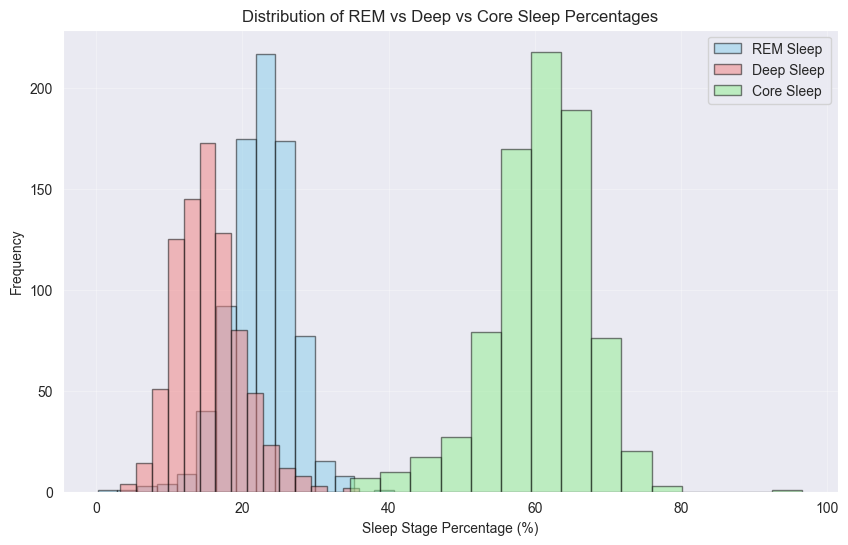

In [90]:
plt.figure(figsize=(10, 6))

# Plot all three distributions on same axes
plt.hist(rem_percentages, bins=15, alpha=0.5, label='REM Sleep',
         color='skyblue', edgecolor='black')
plt.hist(deep_percentages, bins=15, alpha=0.5, label='Deep Sleep',
         color='lightcoral', edgecolor='black')
plt.hist(core_percentages, bins=15, alpha=0.5, label='Core Sleep',
         color='lightgreen', edgecolor='black')

plt.xlabel('Sleep Stage Percentage (%)')
plt.ylabel('Frequency')
plt.title('Distribution of REM vs Deep vs Core Sleep Percentages')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig("../figures/normality/histogram_all_sleep_stages_combined.pdf")
plt.show()

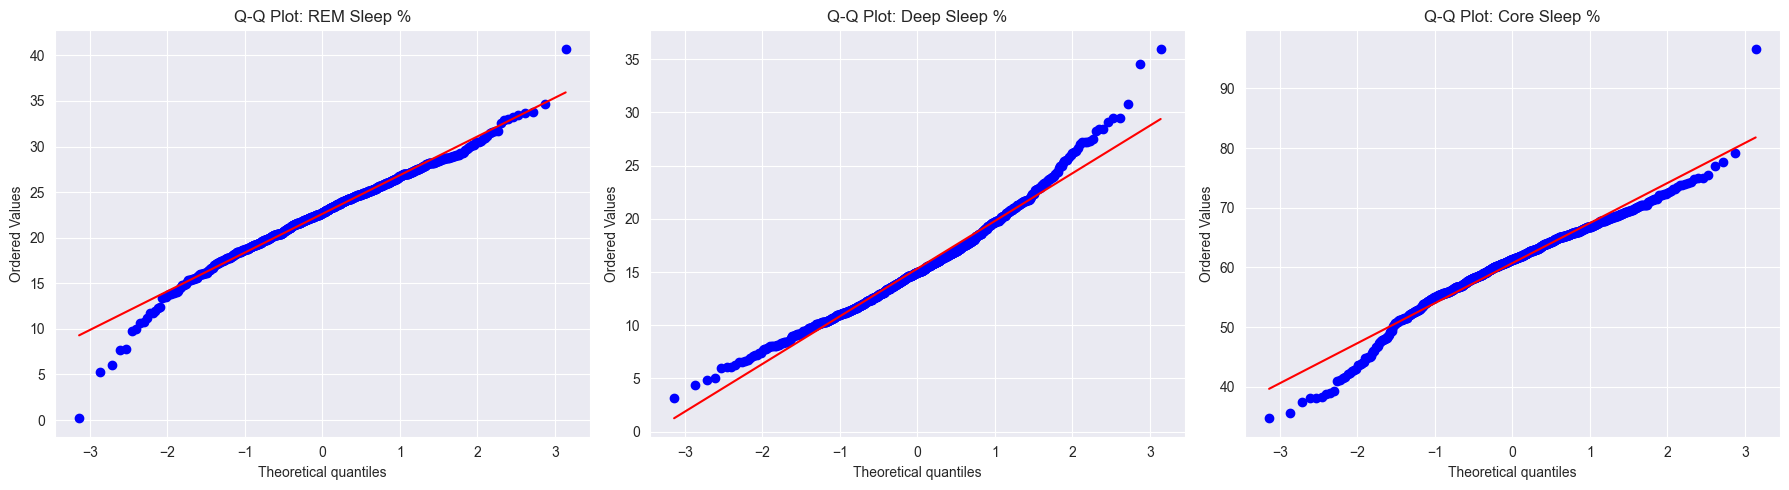

In [91]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

# REM sleep Q-Q plot
stats.probplot(rem_percentages, dist="norm", plot=ax1)
ax1.set_title("Q-Q Plot: REM Sleep %")

# Deep sleep Q-Q plot
stats.probplot(deep_percentages, dist="norm", plot=ax2)
ax2.set_title("Q-Q Plot: Deep Sleep %")

# Core sleep Q-Q plot
stats.probplot(core_percentages, dist="norm", plot=ax3)
ax3.set_title("Q-Q Plot: Core Sleep %")

plt.tight_layout()
plt.savefig("../figures/normality/qq_plots_rem_deep_core_sleep.pdf")
plt.show()

In [92]:
def test_normality_dagostino_typst(data, name):
    # Remove NaN values
    clean_data = data[~np.isnan(data)]

    if len(clean_data) > 0:
        statistic, p_value = stats.normaltest(clean_data)
        result = 'Normal' if p_value > 0.05 else 'Non-normal'
        
        return {
            'variable': name.replace('_', ' ').title(),
            'n': len(clean_data),
            'statistic': f"{statistic:.4f}",
            'p_value': f"{p_value:.6f}" if p_value >= 0.000001 else "< 0.000001",
            'result': result
        }
    else:
        return {
            'variable': name.replace('_', ' ').title(),
            'n': 0,
            'statistic': 'N/A',
            'p_value': 'N/A',
            'result': 'No data'
        }

def create_dagostino_typst_table(results):
    """Create a typst formatted table for D'Agostino-Pearson normality test results"""
    
    # Start the table with header
    typst_table = """#table(
  columns: (auto, auto, auto, auto, auto),
  inset: 8pt,
  align: center + horizon,
  stroke: 0.5pt,
  table.header(
    [*Variable*], [*N*], [*Test Value*], [*P-value*], [*Result*]
  ),"""
    
    # Add data rows
    for result in results:
        typst_table += f"""
  [{result['variable']}], [{result['n']}], [{result['statistic']}], [{result['p_value']}], [{result['result']}],"""
    
    # Close the table
    typst_table += "\n)"
    
    return typst_table

In [93]:
# Perform D'Agostino-Pearson normality tests
results = []
results.append(test_normality_dagostino_typst(rem_percentages, "rem_sleep_percentage"))
results.append(test_normality_dagostino_typst(deep_percentages, "deep_sleep_percentage"))
results.append(test_normality_dagostino_typst(core_percentages, "core_sleep_percentage"))

# Create and display the typst formatted table
typst_table = create_dagostino_typst_table(results)
print(typst_table)

#table(
  columns: (auto, auto, auto, auto, auto),
  inset: 8pt,
  align: center + horizon,
  stroke: 0.5pt,
  table.header(
    [*Variable*], [*N*], [*Test Value*], [*P-value*], [*Result*]
  ),
  [Rem Sleep Percentage], [817], [59.3931], [< 0.000001], [Non-normal],
  [Deep Sleep Percentage], [817], [65.8686], [< 0.000001], [Non-normal],
  [Core Sleep Percentage], [817], [72.4396], [< 0.000001], [Non-normal],
)


## Check if statistically significant difference between treatment groups with wilcoxon rank-sum test

In [94]:
df = pl.read_csv("../data/processed/cleaned_sleep_data_experiment.csv", try_parse_dates=True)
# df.filter(pl.col("sleep_day") == pl.date(2025,6,2)) # Bad measurement day
df

sleep_day,awake_duration_mins,asleep_unspecified_duration_mins,asleep_core_duration_mins,asleep_rem_duration_mins,asleep_deep_duration_mins,total_sleep_duration_mins,total_time_in_bed_mins,sleep_period_start,sleep_period_end,calendar_week,experiment_group
date,f64,f64,f64,f64,f64,f64,f64,"datetime[μs, UTC]","datetime[μs, UTC]",i64,str
2025-05-12,46.0,0.0,240.5,84.0,45.0,369.5,415.5,2025-05-11 22:52:07 UTC,2025-05-12 05:44:37 UTC,20,"""treatment"""
2025-05-13,17.5,0.0,351.0,97.0,66.0,514.0,531.5,2025-05-12 20:48:43 UTC,2025-05-13 05:12:13 UTC,20,"""treatment"""
2025-05-14,11.0,0.0,265.5,93.5,48.0,407.0,418.0,2025-05-13 22:51:58 UTC,2025-05-14 05:17:28 UTC,20,"""treatment"""
2025-05-15,24.0,0.0,287.0,108.0,66.0,461.0,485.0,2025-05-14 21:37:25 UTC,2025-05-15 05:38:55 UTC,20,"""treatment"""
2025-05-16,54.0,84.0,301.5,76.0,76.5,538.0,592.0,2025-05-15 21:29:17 UTC,2025-05-16 07:21:02 UTC,20,"""treatment"""
…,…,…,…,…,…,…,…,…,…,…,…
2025-07-02,4.0,0.0,265.0,104.5,30.0,399.5,403.5,2025-07-01 23:45:37 UTC,2025-07-02 06:06:07 UTC,27,"""control"""
2025-07-03,6.0,0.0,245.5,95.5,47.0,388.0,394.0,2025-07-02 23:56:42 UTC,2025-07-03 06:07:12 UTC,27,"""control"""
2025-07-04,24.5,113.5,221.0,91.0,88.5,514.0,538.5,2025-07-03 23:45:32 UTC,2025-07-04 08:43:59 UTC,27,"""control"""


In [95]:
june_8_2025 = pl.date(2025, 6, 8)

# first experiment duration (4 weeks)
main_df = df.filter(pl.col("sleep_day") <= june_8_2025)
# extension week
extension_df = df.filter(pl.col("sleep_day") >= june_8_2025)

main_df.write_csv("../data/processed/sleep_data_before_june8.csv")
extension_df.write_csv("../data/processed/sleep_data_after_june8.csv")

In [96]:
# Mann-Whitney U test on data before June 8th
from scipy.stats import mannwhitneyu

# Calculate sleep percentages for the main_df
main_df = main_df.with_columns(
    # REM sleep percentage
    (pl.col("asleep_rem_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("rem_sleep_percentage"),

    # Deep sleep percentage
    (pl.col("asleep_deep_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("deep_sleep_percentage"),

    # Core sleep percentage
    (pl.col("asleep_core_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("core_sleep_percentage"),
)

# Split by treatment group
treatment_data = main_df.filter(pl.col("experiment_group") == "treatment")
control_data = main_df.filter(pl.col("experiment_group") == "control")

print(f"Treatment group: {treatment_data.shape[0]} observations")
print(f"Control group: {control_data.shape[0]} observations")
print()

# Extract sleep stage percentages
rem_treatment = treatment_data["rem_sleep_percentage"].to_numpy()
rem_control = control_data["rem_sleep_percentage"].to_numpy()

deep_treatment = treatment_data["deep_sleep_percentage"].to_numpy()
deep_control = control_data["deep_sleep_percentage"].to_numpy()

core_treatment = treatment_data["core_sleep_percentage"].to_numpy()
core_control = control_data["core_sleep_percentage"].to_numpy()

# Perform Mann-Whitney U tests
print("=== Mann-Whitney U Test Results ===")
print()

# REM Sleep test
rem_stat, rem_p = mannwhitneyu(rem_treatment, rem_control, alternative='two-sided')
print("REM Sleep Percentage:")
print(f"  Treatment median: {np.median(rem_treatment):.2f}%")
print(f"  Control median: {np.median(rem_control):.2f}%") 
print(f"  U-statistic: {rem_stat:.2f}")
print(f"  p-value: {rem_p:.6f}")
print(f"  Significant (α=0.05): {'Yes' if rem_p < 0.05 else 'No'}")
print()

# Deep Sleep test
deep_stat, deep_p = mannwhitneyu(deep_treatment, deep_control, alternative='two-sided')
print("Deep Sleep Percentage:")
print(f"  Treatment median: {np.median(deep_treatment):.2f}%")
print(f"  Control median: {np.median(deep_control):.2f}%")
print(f"  U-statistic: {deep_stat:.2f}")
print(f"  p-value: {deep_p:.6f}")
print(f"  Significant (α=0.05): {'Yes' if deep_p < 0.05 else 'No'}")
print()

# Core Sleep test
core_stat, core_p = mannwhitneyu(core_treatment, core_control, alternative='two-sided')
print("Core Sleep Percentage:")
print(f"  Treatment median: {np.median(core_treatment):.2f}%")
print(f"  Control median: {np.median(core_control):.2f}%")
print(f"  U-statistic: {core_stat:.2f}")
print(f"  p-value: {core_p:.6f}")
print(f"  Significant (α=0.05): {'Yes' if core_p < 0.05 else 'No'}")

Treatment group: 14 observations
Control group: 13 observations

=== Mann-Whitney U Test Results ===

REM Sleep Percentage:
  Treatment median: 21.14%
  Control median: 19.42%
  U-statistic: 86.00
  p-value: 0.827143
  Significant (α=0.05): No

Deep Sleep Percentage:
  Treatment median: 11.98%
  Control median: 14.56%
  U-statistic: 60.00
  p-value: 0.138800
  Significant (α=0.05): No

Core Sleep Percentage:
  Treatment median: 62.50%
  Control median: 63.10%
  U-statistic: 88.00
  p-value: 0.903441
  Significant (α=0.05): No


In [97]:
# Mann-Whitney U test: Remove last week (June 2-8) from main experiment and add extension experiment
june_2_2025 = pl.date(2025, 6, 2)
june_8_2025 = pl.date(2025, 6, 8)

# Modified dataset: exclude June 2-8 from main experiment, include extension experiment  
main_experiment_no_last_week = df.filter(pl.col("sleep_day") < june_2_2025)
extension_experiment = df.filter(pl.col("sleep_day") >= june_8_2025)

# Combine the datasets
modified_df = pl.concat([main_experiment_no_last_week, extension_experiment])

print(f"Main experiment (excluding last week): {main_experiment_no_last_week.shape[0]} observations")
print(f"Extension experiment: {extension_experiment.shape[0]} observations") 
print(f"Combined modified dataset: {modified_df.shape[0]} observations")
print()

# Calculate sleep percentages for the modified dataset
modified_df = modified_df.with_columns(
    # REM sleep percentage
    (pl.col("asleep_rem_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("rem_sleep_percentage"),

    # Deep sleep percentage
    (pl.col("asleep_deep_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("deep_sleep_percentage"),

    # Core sleep percentage
    (pl.col("asleep_core_duration_mins") / pl.col("total_sleep_duration_mins") * 100)
    .round(2)
    .alias("core_sleep_percentage"),
)

# Split by treatment group
modified_treatment_data = modified_df.filter(pl.col("experiment_group") == "treatment")
modified_control_data = modified_df.filter(pl.col("experiment_group") == "control")

print(f"Modified dataset - Treatment group: {modified_treatment_data.shape[0]} observations")
print(f"Modified dataset - Control group: {modified_control_data.shape[0]} observations")
print()

# Extract sleep stage percentages
modified_rem_treatment = modified_treatment_data["rem_sleep_percentage"].to_numpy()
modified_rem_control = modified_control_data["rem_sleep_percentage"].to_numpy()

modified_deep_treatment = modified_treatment_data["deep_sleep_percentage"].to_numpy()
modified_deep_control = modified_control_data["deep_sleep_percentage"].to_numpy()

modified_core_treatment = modified_treatment_data["core_sleep_percentage"].to_numpy()
modified_core_control = modified_control_data["core_sleep_percentage"].to_numpy()

# Perform Mann-Whitney U tests on modified dataset
print("=== Mann-Whitney U Test Results (Modified Dataset) ===")
print("(Excluding last week June 2-8, including extension experiment)")
print()

# REM Sleep test
modified_rem_stat, modified_rem_p = mannwhitneyu(modified_rem_treatment, modified_rem_control, alternative='two-sided')
print("REM Sleep Percentage:")
print(f"  Treatment median: {np.median(modified_rem_treatment):.2f}%")
print(f"  Control median: {np.median(modified_rem_control):.2f}%") 
print(f"  U-statistic: {modified_rem_stat:.2f}")
print(f"  p-value: {modified_rem_p:.6f}")
print(f"  Significant (α=0.05): {'Yes' if modified_rem_p < 0.05 else 'No'}")
print()

# Deep Sleep test
modified_deep_stat, modified_deep_p = mannwhitneyu(modified_deep_treatment, modified_deep_control, alternative='two-sided')
print("Deep Sleep Percentage:")
print(f"  Treatment median: {np.median(modified_deep_treatment):.2f}%")
print(f"  Control median: {np.median(modified_deep_control):.2f}%")
print(f"  U-statistic: {modified_deep_stat:.2f}")
print(f"  p-value: {modified_deep_p:.6f}")
print(f"  Significant (α=0.05): {'Yes' if modified_deep_p < 0.05 else 'No'}")
print()

# Core Sleep test
modified_core_stat, modified_core_p = mannwhitneyu(modified_core_treatment, modified_core_control, alternative='two-sided')
print("Core Sleep Percentage:")
print(f"  Treatment median: {np.median(modified_core_treatment):.2f}%")
print(f"  Control median: {np.median(modified_core_control):.2f}%")
print(f"  U-statistic: {modified_core_stat:.2f}")
print(f"  p-value: {modified_core_p:.6f}")
print(f"  Significant (α=0.05): {'Yes' if modified_core_p < 0.05 else 'No'}")

Main experiment (excluding last week): 21 observations
Extension experiment: 7 observations
Combined modified dataset: 28 observations

Modified dataset - Treatment group: 14 observations
Modified dataset - Control group: 14 observations

=== Mann-Whitney U Test Results (Modified Dataset) ===
(Excluding last week June 2-8, including extension experiment)

REM Sleep Percentage:
  Treatment median: 21.14%
  Control median: 23.30%
  U-statistic: 66.00
  p-value: 0.147798
  Significant (α=0.05): No

Deep Sleep Percentage:
  Treatment median: 11.98%
  Control median: 14.60%
  U-statistic: 57.00
  p-value: 0.062725
  Significant (α=0.05): No

Core Sleep Percentage:
  Treatment median: 62.50%
  Control median: 63.03%
  U-statistic: 105.00
  p-value: 0.765200
  Significant (α=0.05): No


In [98]:
def create_combined_mannwhitney_typst_table(results_dict):
    """Create a single typst formatted table for all Mann-Whitney U test results"""
    
    # Start the table with header
    typst_table = f"""#table(
  columns: (auto, auto, auto, auto, auto, auto, auto, auto, auto),
  inset: 8pt,
  align: center + horizon,
  stroke: 0.5pt,
  table.header(
    [*Dataset*], [*Variable*], [*Treatment N*], [*Control N*], [*Treatment Median*], [*Control Median*], [*U-statistic*], [*P-value*], [*Result*]
  ),"""
    
    # Add data rows for each dataset
    for dataset_name, results in results_dict.items():
        for result in results:
            typst_table += f"""
  [{dataset_name}], [{result['variable']}], [{result['treatment_n']}], [{result['control_n']}], [{result['treatment_median']}], [{result['control_median']}], [{result['u_statistic']}], [{result['p_value']}], [{result['result']}],"""
    
    # Close the table
    typst_table += "\n)"
    
    return typst_table

def mannwhitney_test_result(treatment_data, control_data, variable_name):
    """Perform Mann-Whitney U test and format results for typst table"""
    
    # Remove any NaN values
    treatment_clean = treatment_data[~np.isnan(treatment_data)]
    control_clean = control_data[~np.isnan(control_data)]
    
    if len(treatment_clean) > 0 and len(control_clean) > 0:
        # Perform Mann-Whitney U test
        u_stat, p_value = mannwhitneyu(treatment_clean, control_clean, alternative='two-sided')
        
        # Calculate medians
        treatment_median = np.median(treatment_clean)
        control_median = np.median(control_clean)
        
        # Determine significance
        result = 'Significant' if p_value < 0.05 else 'Not significant'
        
        return {
            'variable': variable_name.replace('_', ' ').title(),
            'treatment_n': len(treatment_clean),
            'control_n': len(control_clean),
            'treatment_median': f"{treatment_median:.2f}%",
            'control_median': f"{control_median:.2f}%", 
            'u_statistic': f"{u_stat:.2f}",
            'p_value': f"{p_value:.6f}" if p_value >= 0.000001 else "< 0.000001",
            'result': result
        }
    else:
        return {
            'variable': variable_name.replace('_', ' ').title(),
            'treatment_n': len(treatment_clean),
            'control_n': len(control_clean),
            'treatment_median': 'N/A',
            'control_median': 'N/A',
            'u_statistic': 'N/A', 
            'p_value': 'N/A',
            'result': 'Insufficient data'
        }

In [99]:
# Generate combined typst table for both datasets including core sleep

# Collect results for both datasets
all_results = {}

# Results for original dataset (before June 8th)
original_results = []
original_results.append(mannwhitney_test_result(rem_treatment, rem_control, "rem_sleep_percentage"))
original_results.append(mannwhitney_test_result(deep_treatment, deep_control, "deep_sleep_percentage"))
original_results.append(mannwhitney_test_result(core_treatment, core_control, "core_sleep_percentage"))
all_results["Before June 8th"] = original_results

# Results for modified dataset (excluding June 2-8, including extension)
modified_results = []
modified_results.append(mannwhitney_test_result(modified_rem_treatment, modified_rem_control, "rem_sleep_percentage"))
modified_results.append(mannwhitney_test_result(modified_deep_treatment, modified_deep_control, "deep_sleep_percentage"))
modified_results.append(mannwhitney_test_result(modified_core_treatment, modified_core_control, "core_sleep_percentage"))
all_results["Modified (Excl. June 2-8)"] = modified_results

# Generate single combined table
print("=== COMBINED MANN-WHITNEY U TEST RESULTS ===")
combined_typst_table = create_combined_mannwhitney_typst_table(all_results)
print(combined_typst_table)

=== COMBINED MANN-WHITNEY U TEST RESULTS ===
#table(
  columns: (auto, auto, auto, auto, auto, auto, auto, auto, auto),
  inset: 8pt,
  align: center + horizon,
  stroke: 0.5pt,
  table.header(
    [*Dataset*], [*Variable*], [*Treatment N*], [*Control N*], [*Treatment Median*], [*Control Median*], [*U-statistic*], [*P-value*], [*Result*]
  ),
  [Before June 8th], [Rem Sleep Percentage], [14], [13], [21.14%], [19.42%], [86.00], [0.827143], [Not significant],
  [Before June 8th], [Deep Sleep Percentage], [14], [13], [11.98%], [14.56%], [60.00], [0.138800], [Not significant],
  [Before June 8th], [Core Sleep Percentage], [14], [13], [62.50%], [63.10%], [88.00], [0.903441], [Not significant],
  [Modified (Excl. June 2-8)], [Rem Sleep Percentage], [14], [14], [21.14%], [23.30%], [66.00], [0.147798], [Not significant],
  [Modified (Excl. June 2-8)], [Deep Sleep Percentage], [14], [14], [11.98%], [14.60%], [57.00], [0.062725], [Not significant],
  [Modified (Excl. June 2-8)], [Core Sleep Perc